# Prediction of Stock Price Direction

# Assignment
The task is to predict the day price direction of Amazon.com, Inc. (AMZN) stock.

The stock market is very complex and highly volatile. In order to be profitable, we do not need to predict the correct price, but rather, the price direction: whether it will be higher or lower than the price that is today. If we predict it to be higher, we might as well buy some stocks, else, we should probably sell.

Therefore, the target would be a binary classification whether the next day closing price will be higher than the opening price.

## Data Description
We have data for the period from 1997 up to year 2020 that we have split that into training (1997-2016), validation (2016-2018) and testing (2018-2020) periods. The data is available in the AMZN_train.csv, AMZN_val.csv and AMZN_test.csv files, respectively.

Each dataset has the same format with the following 7 columns:

Date - in format YYYY-MM-DD
Open - stock price upon opening of an exchange
High - the highest stock price on a given day
Low - the lowest stock price on a given day
Close - stock price at the end of a trading day
Adj Close - adjusted closing price that takes into account corporate actions
Volume - the amount of shares traded over the course of a trading day

## Practicalities
Define, train and evaluate a predictive model that takes as the input the data provided. Do not use external data for this project. You may use any algorithm of your choice or compare multiple models.

Make sure that the solution reflects your entire thought process - it is more important how the code is structured rather than the final metrics. You may assume that any model resulting in AUC > 0.515 will be enough. You are expected to spend no more than 3 hours working on this project.

#### To download the dataset <a href="https://drive.google.com/drive/folders/1KcJHVPDFKjJ4l7DAZGo_8141SieXpCB0?usp=sharing"> Click here </a>

In [1]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv("C:/Users/manoj/Downloads/AMZN_train.csv")
val_data = pd.read_csv("C:/Users/manoj/Downloads/AMZN_val.csv")
test_data = pd.read_csv("C:/Users/manoj/Downloads/AMZN_test.csv")

# Display the first few rows of the training data
print(train_data.head())


         Date      Open      High       Low     Close  Adj Close    Volume
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
              Open         High          Low        Close    Adj Close  \
count  4781.000000  4781.000000  4781.000000  4781.000000  4781.000000   
mean    127.619845   129.480122   125.697925   127.662449   127.662449   
std     145.693083   147.132537   144.053633   145.677581   145.677581   
min       1.406250     1.447917     1.312500     1.395833     1.395833   
25%      34.299999    34.849998    33.660000    34.310001    34.310001   
50%      62.880001    64.750000    60.937500    62.750000    62.750000   
75%     189.009995   191.600006   186.210007   189.029999   189.029999   
max     717.380005   722.450012   711.510010   717.929993   717.929993   

             Volume  
count  4.781000e+03  
mean   8.225935e+06  
std    7.810188e+06  
min    4.872000e+05  
25%    4.200900e+06  
50%    6.200100e+06  
75%    9.239900e+06  
max    1.043292e+08  


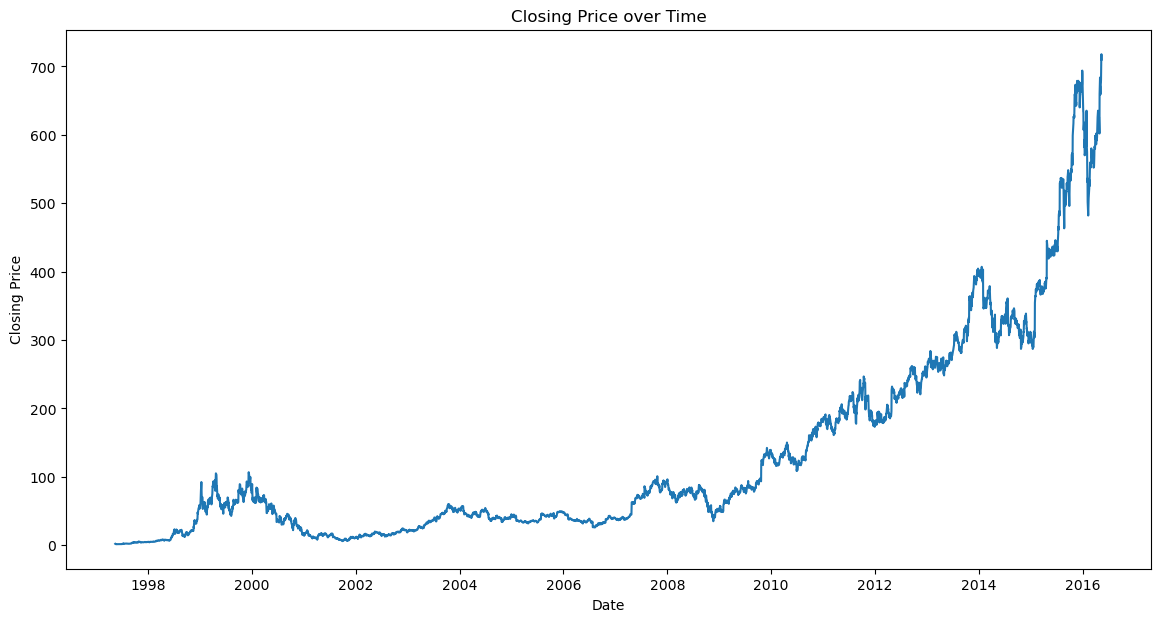

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(train_data.isnull().sum())

# Summary statistics
print(train_data.describe())

# Plot the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(train_data['Date']), train_data['Close'])
plt.title('Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


In [3]:
# Create new features
def create_features(df):
    df['Return'] = df['Close'].pct_change()
    df['High_Low_Pct'] = (df['High'] - df['Low']) / df['Close']
    df['Pct_Change'] = (df['Close'] - df['Open']) / df['Open']
    df['5_Day_MA'] = df['Close'].rolling(window=5).mean()
    df['10_Day_MA'] = df['Close'].rolling(window=10).mean()
    df['20_Day_MA'] = df['Close'].rolling(window=20).mean()
    df['Volatility'] = df['Close'].rolling(window=10).std()
    df = df.dropna()
    return df

train_data = create_features(train_data)
val_data = create_features(val_data)
test_data = create_features(test_data)


In [4]:
# Define target variable
train_data['Target'] = (train_data['Close'].shift(-1) > train_data['Open']).astype(int)
val_data['Target'] = (val_data['Close'].shift(-1) > val_data['Open']).astype(int)
test_data['Target'] = (test_data['Close'].shift(-1) > test_data['Open']).astype(int)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Prepare the data for modeling
features = ['Return', 'High_Low_Pct', 'Pct_Change', '5_Day_MA', '10_Day_MA', '20_Day_MA', 'Volatility']
X_train = train_data[features]
y_train = train_data['Target']
X_val = val_data[features]
y_val = val_data['Target']
X_test = test_data[features]
y_test = test_data['Target']

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
log_reg_model = LogisticRegression(random_state=42)

# Train models
rf_model.fit(X_train, y_train)
log_reg_model.fit(X_train, y_train)


C:\Users\manoj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [6]:
# Predictions
rf_pred = rf_model.predict(X_val)
log_reg_pred = log_reg_model.predict(X_val)

# Evaluate Random Forest
rf_auc = roc_auc_score(y_val, rf_model.predict_proba(X_val)[:, 1])
rf_accuracy = accuracy_score(y_val, rf_pred)

# Evaluate Logistic Regression
log_reg_auc = roc_auc_score(y_val, log_reg_model.predict_proba(X_val)[:, 1])
log_reg_accuracy = accuracy_score(y_val, log_reg_pred)

print(f"Random Forest AUC: {rf_auc}, Accuracy: {rf_accuracy}")
print(f"Logistic Regression AUC: {log_reg_auc}, Accuracy: {log_reg_accuracy}")


Random Forest AUC: 0.7209624417184247, Accuracy: 0.6673553719008265
Logistic Regression AUC: 0.7700049894189908, Accuracy: 0.5909090909090909


In [7]:
# Select the best model (assuming Random Forest performs better)
best_model = rf_model if rf_auc > log_reg_auc else log_reg_model

# Evaluate on test set
test_pred = best_model.predict(X_test)
test_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
test_accuracy = accuracy_score(y_test, test_pred)

print(f"Test AUC: {test_auc}, Test Accuracy: {test_accuracy}")


Test AUC: 0.7084469129071828, Test Accuracy: 0.5814432989690722
